In [1]:
"""Submission for exercise sheet 5

SUBMIT this file as submission_<STUDENTID>.py where
you replace <STUDENTID> with your student ID, e.g.,
submission_1234567.py
"""

import torch
import torch.nn as nn
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader,TensorDataset

"""
DO NOT MODIFY THIS METHOD
"""
def get_data():
    # Load data
    fuel = pd.read_json('assets/fuel.json')
    X = fuel.copy()
    y = X.pop('FE')

    # Preprocess data
    preprocessor = make_column_transformer(
        (StandardScaler(),
        make_column_selector(dtype_include=np.number)),
        (OneHotEncoder(sparse_output=False),
        make_column_selector(dtype_include=object)),
    )
    X = preprocessor.fit_transform(X)
    y = np.log(y)

    # Split data into training/testing
    X_trn, X_tst, y_trn, y_tst = train_test_split(
        X, 
        y, 
        test_size=0.33, 
        random_state=42)
    
    # Create PyTorch datasets
    ds_trn = TensorDataset(
        torch.tensor(np.array(X_trn), dtype=torch.float32),
        torch.tensor(np.array(y_trn), dtype=torch.float32))
    ds_tst = TensorDataset(
        torch.tensor(np.array(X_tst), dtype=torch.float32),
        torch.tensor(np.array(y_tst), dtype=torch.float32))
    return ds_trn, ds_tst


In [ ]:
from torch.nn.functional import relu
# Exercise 5.1
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.f1=nn.Linear(50,18)
        self.f2=nn.Linear(18,1)
        
    def forward(self, x):
        fn_f1=self.f1(x)
        act = torch.relu(fn_f1)
        fn_f2= self.f2(act)
        return fn_f2
    

def train():
    ds_trn, _ = get_data()

    dl_trn = DataLoader(ds_trn, batch_size=32, shuffle=True)

    loss_fn = nn.MSELoss(reduction="sum")
    model = MLP()
    eta=0.001
    optimizer = torch.optim.Adam(model.parameters(), lr=eta)

    for epoch in range(150):
        for x_trn, y_trn in dl_trn:
            optimizer.zero_grad()
            y_hat=model(x_trn)
            loss = loss_fn(y_hat, y_trn.view(-1,1))
            loss.backward()
            optimizer.step()
    return model  

def evaluate(model, x_test, y_test):
    error=0
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        y_pred = model(x_test)
        error += (y_pred.view(-1).exp()-y_test.view(-1).exp()).abs().sum().item() 
        N = y_test.shape[0]
        return error/N
  
trained_model=train()    

In [141]:
ds_trn, ds_tst = get_data()
X_tst = ds_tst[:][0]  # Features (tensor)
y_tst = ds_tst[:][1]

# dl_trn = DataLoader(ds_trn, batch_size=32, shuffle=True)
mse = evaluate(trained_model, X_tst, y_tst)
print(mse)

2.7825454128244536


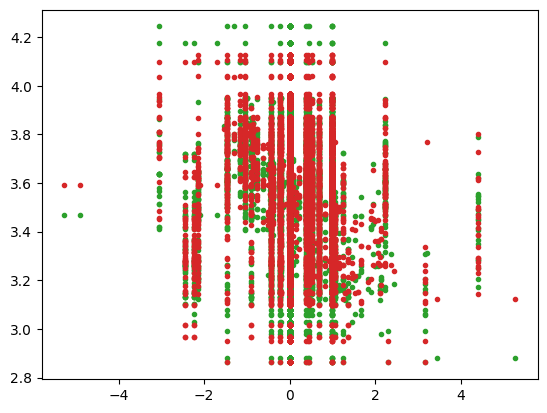

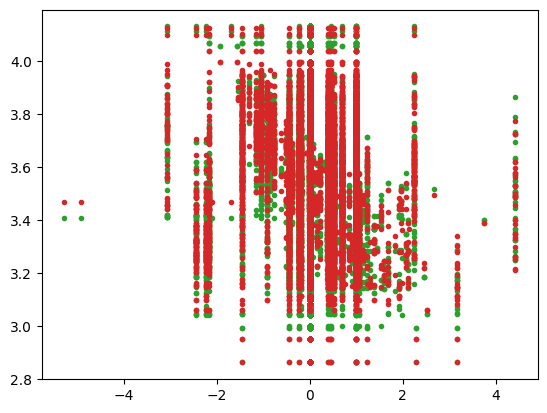

In [4]:
import matplotlib.pyplot as plt

ds_trn, ds_tst = get_data()

X_tst = ds_tst[:][0]  # Features (tensor)
y_tst = ds_tst[:][1]

plt.plot(X_tst, 
         y_tst.detach().numpy(),'.', color='tab:green',
         label='Predictions')

plt.plot(X_tst, 
         trained_model(X_tst).detach().numpy(),'.', color='tab:red',
         label='Predictions')
plt.show()
X_trn = ds_trn[:][0]  # Features (tensor)
y_trn = ds_trn[:][1]

plt.plot(X_trn, 
         y_trn.detach().numpy(),'.', color='tab:green',
         label='Predictions')

plt.plot(X_trn, 
         trained_model(X_trn).detach().numpy(),'.', color='tab:red',
         label='Predictions')

plt.show()

In [ ]:
"""Submission for exercise sheet 5

SUBMIT this file as submission_<STUDENTID>.py where
you replace <STUDENTID> with your student ID, e.g.,
submission_1234567.py
"""

import torch
import torch.nn as nn
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader,TensorDataset
from torch.nn.functional import relu

"""
DO NOT MODIFY THIS METHOD
"""
def get_data():
    # Load data
    fuel = pd.read_json('assets/fuel.json')
    X = fuel.copy()
    y = X.pop('FE')

    # Preprocess data
    preprocessor = make_column_transformer(
        (StandardScaler(),
        make_column_selector(dtype_include=np.number)),
        (OneHotEncoder(sparse_output=False),
        make_column_selector(dtype_include=object)),
    )
    X = preprocessor.fit_transform(X)
    y = np.log(y)
    
    # Split data into training/testing
    X_trn, X_tst, y_trn, y_tst = train_test_split(
        X, 
        y, 
        test_size=0.33, 
        random_state=42)
    
    # Create PyTorch datasets
    ds_trn = TensorDataset(
        torch.tensor(np.array(X_trn), dtype=torch.float32),
        torch.tensor(np.array(y_trn), dtype=torch.float32))
    ds_tst = TensorDataset(
        torch.tensor(np.array(X_tst), dtype=torch.float32),
        torch.tensor(np.array(y_tst), dtype=torch.float32))
    return ds_trn, ds_tst


# # Exercise 5.1
# class MLP(nn.Module):
#     def __init__(self):
#         super(MLP, self).__init__()
#         # <--- YOUR CODE HERE --->  
        
#     def forward(self, x):
#         # <--- YOUR CODE HERE --->  
#         pass
      
    
# def train():
#     ds_trn, _ = get_data()
#     dl_trn = DataLoader(ds_trn, batch_size=32, shuffle=True)
    
#     model = MLP()
    
#     # <--- YOUR CODE HERE --->  
      
#     return model    


# Exercise 5.1
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.f1=nn.Linear(50,18)
        self.f2=nn.Linear(18,1)
        
    def forward(self, x):
        fn_f1=self.f1(x)
        act = relu(fn_f1)
        fn_f2= self.f2(act)
        return fn_f2
    

def train():
    ds_trn, _ = get_data()
    dl_trn = DataLoader(ds_trn, batch_size=32, shuffle=True)
    loss_fn = nn.MSELoss()
    model = MLP()
    eta=0.01
    optimizer = torch.optim.Adam(model.parameters(), lr=eta)

    for epoch in range(100):
        for x_trn, y_trn in ds_trn:
            optimizer.zero_grad()
            y_hat=model(x_trn)
            loss = loss_fn(y_hat, y_trn)
            loss.backward()
            optimizer.step()
    return model   
    